# Homework 10: Linear Regression

**Reading**: 
* [Linear Regression](https://www.inferentialthinking.com/chapters/15/2/Regression_Line.html)
* [Method of Least Squares](https://www.inferentialthinking.com/chapters/15/3/Method_of_Least_Squares.html)
* [Least Squares Regression](https://www.inferentialthinking.com/chapters/15/4/Least_Squares_Regression.html)

Please complete this notebook by filling in the cells provided. Before you begin, execute the following cell. Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged. For all problems that you must write our explanations and sentences for, you **must** provide your answer in the designated space. 

In [1]:
# Don't change this cell; just run it. 

import numpy as np
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

## Exploring the PTEN Gene with Linear Regression

## 1. PTEN Linear Regression

This week's homework is about linear regression. The dataset we'll be using is from the Cancer Cell Line Encyclopedia -- you can read more about this database in this [paper](https://www.nature.com/articles/s41586-019-1186-3).

The specific dataset we'll be taking a look at is expression data for the PTEN gene in around 1000 cell lines. The PTEN gene is a tumor-suppressing gene, and mutations in the PTEN gene are associated with many types of cancer. A cell line is group of cells that are kept alive and replicate indefinitely in culture (grown in petri dishes, for example).

Run the following cell to load the `pten` table. The `pten` table has four columns, a column for the specific `Cell Line`, a column for the `Copy Number`, which is how many times a copy of a portion of the PTEN gene is found in the DNA of that cell line, `mRNA Expression (Affy)`, and `mRNA Expression (RNAseq)`.

In [2]:
# Just run this cell
pten = Table().read_table("../Datasets/pten.csv")
pten.show(5)

Cell Line,Copy Number,mRNA Expression (Affy),mRNA Expression (RNAseq)
DMS53_LUNG,0.1728,7.4829,2.4898
SW1116_LARGE_INTESTINE,0.191,8.15495,2.86857
NCIH1694_LUNG,-0.2372,7.99308,2.82148
P3HR1_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,-0.0129,9.96358,4.65702
HUT78_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,-1.1013,8.74116,2.75236


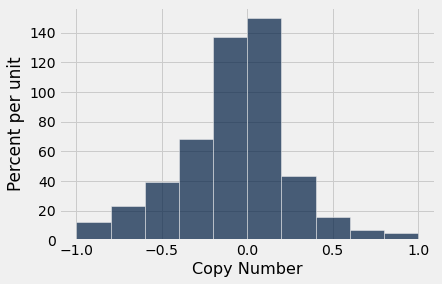

In [3]:
# Just run this cell
pten.hist("Copy Number", bins = np.arange(-1, 1.1, 0.2))

**Question 1**

Looking at the histogram above, we want to check whether or not `Copy Number` is in standard units. For this question, compute the mean and the standard deviation of the values in `Copy Number` and assign these values to `copy_number_mean` and `copy_number_sd` respectively. After you calculate these values, assign `is_su` to either `True` if you think that `Copy Numbers` is in standard units or `False` if you think otherwise.

<!--
BEGIN QUESTION
name: q1_1
manual: false
-->

In [8]:
def standard_units(x):
    "Convert any array of numbers to standard units."
    return (x - np.average(x)) / np.std(x)

In [14]:
copy_number = pten.column("Copy Number")
copy_number_mean = np.mean(copy_number)
copy_number_sd = np.std(copy_number)
is_su = ...
print(f"Mean: {copy_number_mean}, SD: {copy_number_sd}, Is in standard units?: {is_su}")

1.1866720920967757e-17
1.0
Mean: -0.19447913669064748, SD: 0.7462401942190691, Is in standard units?: Ellipsis


**Question 2**

Create the function `standard_units` so that it converts the values in the array `array` to standard units. We'll then use `standard_units` to create a new table, `pten_su`, that converts all the values in the table `pten` to standard units.

<!--
BEGIN QUESTION
name: q1_2
manual: false
-->

In [ ]:
def standard_units(array):
    ...

# DON'T DELETE OR MODIFY ANY OF THE LINES OF CODE BELOW IN THIS CELL
pten_su = Table().with_columns("Cell Line", pten.column("Cell Line"),
                               "Copy Number SU", standard_units(pten.column("Copy Number")),
                               "mRNA Expression (Affy) SU", standard_units(pten.column("mRNA Expression (Affy)")),
                               "mRNA Expression (RNAseq) SU", standard_units(pten.column("mRNA Expression (RNAseq)"))                             
                              )
pten_su.show(5)

You should always visually inspect your data, before numerically analyzing any relationships in your dataset. Run the following cell in order to look at the relationship between the variables in our dataset.

In [ ]:
# Just run this cell
pten_su.scatter("mRNA Expression (Affy) SU", "mRNA Expression (RNAseq) SU")
pten_su.scatter("Copy Number SU", "mRNA Expression (Affy) SU")
pten_su.scatter("Copy Number SU", "mRNA Expression (RNAseq) SU")

**Question 3**

Which of the following relationships do you think has the weakest correlation (i.e. lowest absolute value of `r`)? Assign `weakest_correlation` to the number corresponding to the relationship you think has the lowest correlation.

1. mRNA Expression (Affy) vs. mRNA Expression (RNAseq) 
2. Copy Number vs. mRNA Expression (Affy)
3. Copy Number vs. mRNA Expression (RNAseq) 

<!--
BEGIN QUESTION
name: q1_3
manual: false
-->

In [ ]:
weakest_correlation = ...

**Question 4**

Now, using the `standard units` function, define the function `correlation` which computes the correlation between `array1` and `array2`.

<!--
BEGIN QUESTION
name: q1_4
manual: false
-->

In [ ]:
def correlation(array1, array2):
    ...

# This computes the correlation between the different variables in pten
copy_affy = correlation(pten.column("Copy Number"), pten.column("mRNA Expression (Affy)"))
copy_rnaseq = correlation(pten.column("Copy Number"), pten.column("mRNA Expression (RNAseq)"))
affy_rnaseq = correlation(pten.column("mRNA Expression (Affy)"), pten.column("mRNA Expression (RNAseq)"))

print(f" \
      mRNA Expression (Affy) vs. mRNA Expression (RNAseq) Correlation: {affy_rnaseq}, \n \
      Copy Number vs. mRNA Expression (Affy) Correlation: {copy_affy}, \n \
      Copy Number vs. mRNA Expression (RNAseq) Correlation: {copy_rnaseq}")

**Question 5**

If we switch what we input as arguments to `correlation`, i.e. found the correlation between `mRNA Expression (Affy)` vs. `Copy Number` instead of the other way around, would the correlation change? Assign `correlation_change` to either `True` if you think yes, or `False` if you think no.

<!--
BEGIN QUESTION
name: q1_5
manual: false
-->

In [ ]:
correlation_change = ...

**Question 6**

Looking at both the scatter plots after Question 2 and the correlations computed in Question 4, describe a pattern you see in the relationships between the variables.

<!--
BEGIN QUESTION
name: q1_6
manual: true
-->
<!-- EXPORT TO PDF -->

*Write your answer here, replacing this text.*

**Question 7**

Let's look at the relationship between Copy Number vs. mRNA Expression (Affy) only. Define a function called `regression_parameters` that returns the parameters of the regression line as a two-item array containing the intercept and slope of the regression line as the first and second elements respectively. The function `regression_parameters` takes in two arguments, an array of `x` values, and an array of `y` values.

<!--
BEGIN QUESTION
name: q1_7
manual: false
-->

In [ ]:
def regression_parameters(x, y):
    ...
    slope = ...
    intercept = ...
    return make_array(intercept, slope)

parameters = regression_parameters(pten.column("Copy Number"), pten.column("mRNA Expression (Affy)"))
parameters

**Question 8**

If we switch what we input as arguments to `regression_parameters`, i.e. found the parameters for the regression line for `mRNA Expression (Affy)` vs. `Copy Number` instead of the other way around, would the regression parameters change (would the slope and/or intercept change)? Assign `parameters_change` to either `True` if you think yes, or `False` if you think no.

<!--
BEGIN QUESTION
name: q1_8
manual: false
-->

In [ ]:
parameters_change = ...

**Question 9**

Now, let's look at how the regression parameters look like in standard units. Use the table `pten_su` and the function `regression_parameters`, and assign `parameters_su` to a two-item array containing the intercept and the slope of the regression line for Copy Number in standard units vs. mRNA Expression (Affy) in standard units.


<!--
BEGIN QUESTION
name: q1_9
manual: false
-->

In [ ]:
parameters_su = ...
parameters_su

If you are unfamiliar with scientific notation, running the following cell will help you see the slope and intercept more clearly.

In [ ]:
round(parameters_su.item(0), 2), round(parameters_su.item(1), 2)

**Question 10**

Looking at the array `parameters_su`, what do you notice about the intercept and slope values specifically? Relate them to another value we already calculated in a previous question, as well as relate them to an equation.


<!--
BEGIN QUESTION
name: q1_10
manual: true
-->
<!-- EXPORT TO PDF -->

*Write your answer here, replacing this text.*



The oldest and most commonly used cell line in Biology is the HeLa cell line, named after Henrietta Lacks, whose cervical cancer cells were taken without her consent in 1951 to create this cell line. The issue of data privacy and consent is very important to data science! 

There are many issues with this case regarding social, racial, and other ethical concerns, and we encourage you to read about them [here](https://www.hopkinsmedicine.org/henriettalacks/). Understanding where your data comes from, including how it was collected and who it was collected from, is extremely important in practicing careful and ethical data science.

**Question 11**

The HeLa cell line is missing from our dataset. If we know that the HeLa Copy Number value is 0.5, what is the predicted mRNA Expression (Affy) value? Use the values in `parameters` that we derived in Question 1.7, and assign the result to `hela_affy`.

<!--
BEGIN QUESTION
name: q1_11
manual: false
-->

In [ ]:
hela_affy = ...
hela_affy

**Question 12**

Compute the predicted mRNA Expression (Affy) values from the Copy Number values in the `pten` table. Use the values in the `parameters` array from Question 1.7, and assign the result to `predicted_affy`. We'll plot your computed regression line with the scatter plot from after question 1.2 of Copy Number vs. mRNA Expression (Affy).

<!--
BEGIN QUESTION
name: q1_12
manual: true
-->
<!-- EXPORT TO PDF -->

*Sanity Check: Given the strong correlation between the two variables, does your regression line make sense / have a good fit?*

In [ ]:
predicted_affy = ...

# DON'T CHANGE/DELETE ANY OF THE BELOW CODE IN THIS CELL
(pten.with_column("Predicted mRNA Expression (Affy)", predicted_affy)
 .select("Copy Number", "mRNA Expression (Affy)", "Predicted mRNA Expression (Affy)")
 .scatter("Copy Number"))
plt.ylabel("mRNA Expression (Affy)");

## Fitting a least-squares regression line

Recall that the least-square regression line is the unique straight line that minimizes root mean squared error (RMSE) among all possible fit lines. Using this property, we can find the equation of the regression line by finding the pair of slope and intercept values that minimize root mean squared error.

**Question 13**

Define a function called `RMSE`. It should take two arguments:

1. the intercept of a line (a number)
2. the slope of a line (a number).

It should return a number that is the root mean squared error (RMSE) for a line defined with the arguments slope and intercept used to predict mRNA Expression (Affy) values from Copy Number values for each row in the `pten` table.

*Hint: Errors are defined as the difference between the actual `y` values and the predicted `y` values.*

*Note: if you need a refresher on RMSE, here's the [link](https://www.inferentialthinking.com/chapters/15/3/Method_of_Least_Squares.html#Root-Mean-Squared-Error) from the textbook*

<!--
BEGIN QUESTION
name: q1_13
manual: false
-->

In [ ]:
def RMSE(intercept, slope):
    affy = pten.column("mRNA Expression (Affy)")
    copynum = pten.column("Copy Number")
    predicted_affy = ...
    ...

# DON'T CHANGE THE FOLLOWING LINES BELOW IN THIS CELL
rmse_example = RMSE(8.75, 0.92)
rmse_example

**Question 14**

What is the RMSE of a line with slope 0 and intercept of the mean of `y` equal to?

*Hint 1: The line with slope 0 and intercept of mean of `y` is just a straight horizontal line at the mean of `y`*

*Hint 2: What does the formula for RMSE become if we input our predicted `y` values in the formula. Try writing it out on paper! It should be a familiar formula.*

<!--
BEGIN QUESTION
name: q1_14
manual: true
-->
<!-- EXPORT TO PDF -->

*Write your answer here, replacing this text.*

**Question 15**

Find the parameters that minimizes RMSE of the regression line for Copy Number vs. mRNA Expression (Affy). Assign the result to `minimized_parameters`.

If you haven't tried to use the `minimize` yet, now is a great time to practice. Here's an [example from the textbook](https://www.inferentialthinking.com/chapters/15/3/Method_of_Least_Squares.html#numerical-optimization).

*Hint: Use the `RMSE` function in Question 1.13*

**NOTE: When you use the minimize function, please pass in `smooth=True` as the second argument to this function. You'll need to do this, otherwise, your answer will be incorrect**

<!--
BEGIN QUESTION
name: q1_15
manual: false
-->

In [ ]:
minimized_parameters = ...
minimized_parameters

**Question 16**

The slope and intercept pair you found in Question 1.15 should be very similar to the values that you found in Question 1.7. Why were we able to minimize RMSE to find the same slope and intercept from the previous formulas?


<!--
BEGIN QUESTION
name: q1_16
manual: true
-->
<!-- EXPORT TO PDF -->

*Write your answer here, replacing this text.*

**Question 17**

If we had instead minimized mean squared error (MSE), would we have gotten the same slope and intercept of the minimized root mean squared error (RMSE) results? Assign `same_parameters` to either `True` if you think yes, or `False` if you think no.


<!--
BEGIN QUESTION
name: q1_17
manual: false
-->

In [ ]:
same_parameters = ...
same_parameters

Let's look at the scatter plot of the relationship between Copy Number and mRNA Expression (Affy) again:

In [ ]:
pten.scatter("Copy Number", "mRNA Expression (Affy)")

**Question 18**

Using a linear regression model, would we be able to obtain accurate predictions for most of the points? Explain why or why not.


<!--
BEGIN QUESTION
name: q1_18
manual: true
-->
<!-- EXPORT TO PDF -->

*Write your answer here, replacing this text.*